<a href="https://colab.research.google.com/github/tusharmaaa/-/blob/main/retaildatset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
file_path = '/content/drive/MyDrive/dataset/retail_sales_dataset.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

# Load dataset (replace with the actual file path if needed)
data = {
    "Transaction_ID": [1, 2],
    "Date": ["24-11-2023", "27-02-2023"],
    "Customer_ID": ["CUST001", "CUST002"],
    "Gender": ["Male", "Female"],
    "Age": [34, 26],
    "Product_Category": ["Beauty", "Clothing"],
    "Quantity": [3, 2],
    "Price_per_Unit": [50, 500],
    "Total_Amount": [150, 1000],
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Check dataset info
print("\nDataset Information:")
print(df.info())

# Check for null values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Preview:
   Transaction_ID       Date Customer_ID  Gender  Age Product_Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   

   Quantity  Price_per_Unit  Total_Amount  
0         3              50           150  
1         2             500          1000  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    2 non-null      int64         
 1   Date              2 non-null      datetime64[ns]
 2   Customer_ID       2 non-null      object        
 3   Gender            2 non-null      object        
 4   Age               2 non-null      int64         
 5   Product_Category  2 non-null      object        
 6   Quantity          2 non-null      int64         
 7   Price_per_Unit 

In [2]:
# Clean column names
df.columns = [col.strip().replace(' ', '_') for col in df.columns]

# Handle missing values (if any)
df.fillna(0, inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Verify the cleaned data
print("\nCleaned Dataset:")
print(df.head())



Cleaned Dataset:
   Transaction_ID       Date Customer_ID  Gender  Age Product_Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   

   Quantity  Price_per_Unit  Total_Amount  
0         3              50           150  
1         2             500          1000  


In [3]:
# Summary statistics for numerical data
print("\nSummary Statistics:")
print(df.describe())

# Count gender distribution
gender_count = df['Gender'].value_counts()
print("\nGender Distribution:")
print(gender_count)

# Count products sold per category
product_count = df['Product_Category'].value_counts()
print("\nProduct Category Count:")
print(product_count)



Summary Statistics:
       Transaction_ID                 Date        Age  Quantity  \
count        2.000000                    2   2.000000  2.000000   
mean         1.500000  2023-07-12 00:00:00  30.000000  2.500000   
min          1.000000  2023-02-27 00:00:00  26.000000  2.000000   
25%          1.250000  2023-05-05 12:00:00  28.000000  2.250000   
50%          1.500000  2023-07-12 00:00:00  30.000000  2.500000   
75%          1.750000  2023-09-17 12:00:00  32.000000  2.750000   
max          2.000000  2023-11-24 00:00:00  34.000000  3.000000   
std          0.707107                  NaN   5.656854  0.707107   

       Price_per_Unit  Total_Amount  
count        2.000000      2.000000  
mean       275.000000    575.000000  
min         50.000000    150.000000  
25%        162.500000    362.500000  
50%        275.000000    575.000000  
75%        387.500000    787.500000  
max        500.000000   1000.000000  
std        318.198052    601.040764  

Gender Distribution:
Gender
Male

<ipython-input-4-25c212435f8e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


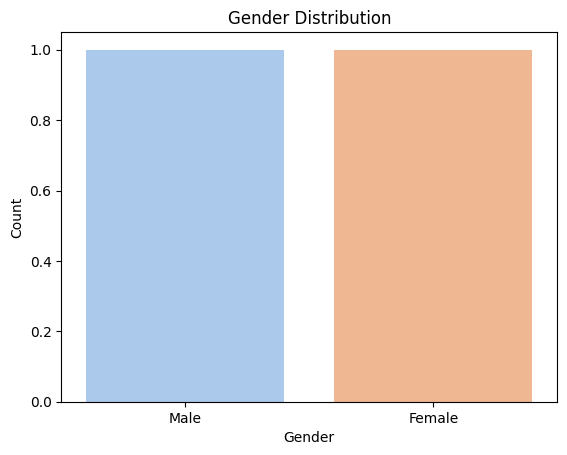

In [4]:
# Gender distribution bar plot
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


<ipython-input-5-0a196d8227b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category', y='Quantity', data=df, estimator=sum, palette='viridis')


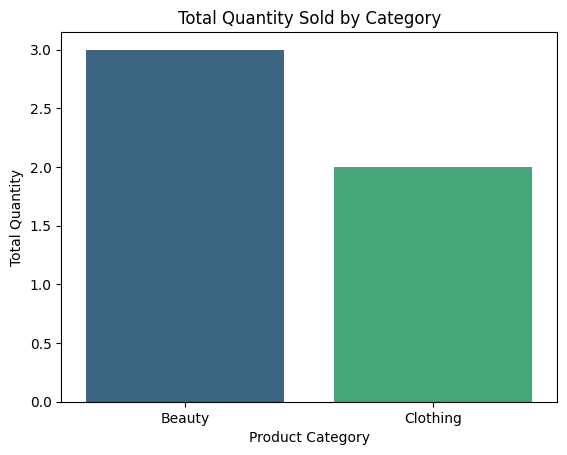

In [5]:
# Bar plot of total quantity sold by category
sns.barplot(x='Product_Category', y='Quantity', data=df, estimator=sum, palette='viridis')
plt.title("Total Quantity Sold by Category")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity")
plt.show()


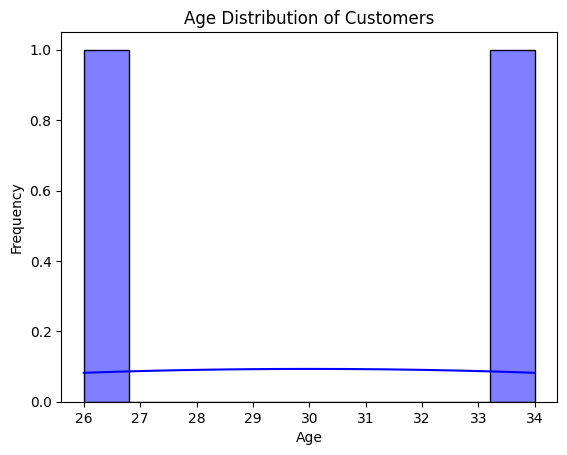

In [6]:
# Distribution of customer ages
sns.histplot(df['Age'], bins=10, kde=True, color='blue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


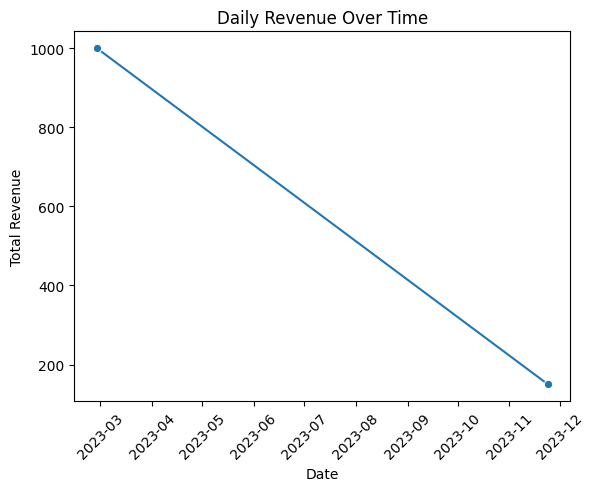

In [7]:
# Group data by date to calculate daily revenue
daily_revenue = df.groupby('Date')['Total_Amount'].sum().reset_index()

# Line plot of revenue over time
sns.lineplot(x='Date', y='Total_Amount', data=daily_revenue, marker='o')
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


In [8]:
# Top products by total revenue
top_products = df.groupby('Product_Category')['Total_Amount'].sum().reset_index().sort_values(by='Total_Amount', ascending=False)
print("\nTop Products by Revenue:")
print(top_products)



Top Products by Revenue:
  Product_Category  Total_Amount
1         Clothing          1000
0           Beauty           150


In [9]:
# Top 5 customers by total spending
top_customers = df.groupby('Customer_ID')['Total_Amount'].sum().reset_index().sort_values(by='Total_Amount', ascending=False)
print("\nTop 5 Customers by Spending:")
print(top_customers.head(5))



Top 5 Customers by Spending:
  Customer_ID  Total_Amount
1     CUST002          1000
0     CUST001           150


<ipython-input-10-218ef3a75879>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Quantity', data=gender_quantity, palette='Set2')


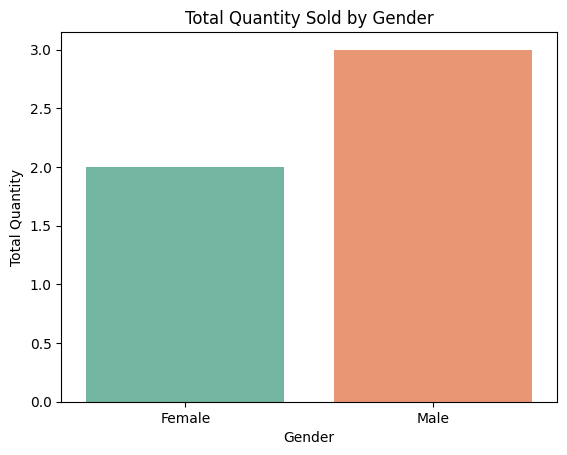

In [10]:
# Total quantity sold by gender
gender_quantity = df.groupby('Gender')['Quantity'].sum().reset_index()

sns.barplot(x='Gender', y='Quantity', data=gender_quantity, palette='Set2')
plt.title("Total Quantity Sold by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Quantity")
plt.show()


<ipython-input-11-37618ebee8a1>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = df.groupby('Age_Group')['Total_Amount'].mean().reset_index()
<ipython-input-11-37618ebee8a1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Total_Amount', data=age_group_spending, palette='coolwarm')


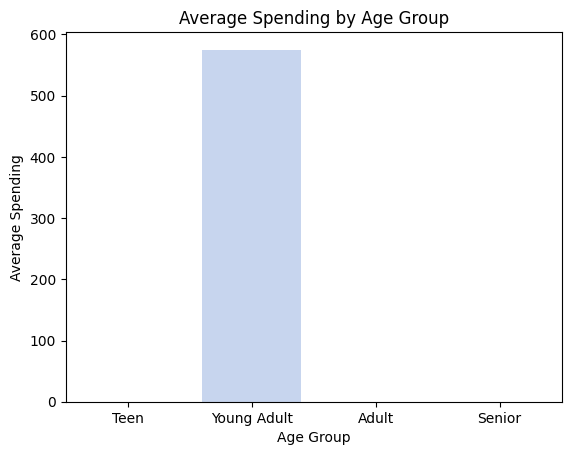

In [11]:
# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['Teen', 'Young Adult', 'Adult', 'Senior'])

# Average spending by age group
age_group_spending = df.groupby('Age_Group')['Total_Amount'].mean().reset_index()

sns.barplot(x='Age_Group', y='Total_Amount', data=age_group_spending, palette='coolwarm')
plt.title("Average Spending by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Spending")
plt.show()


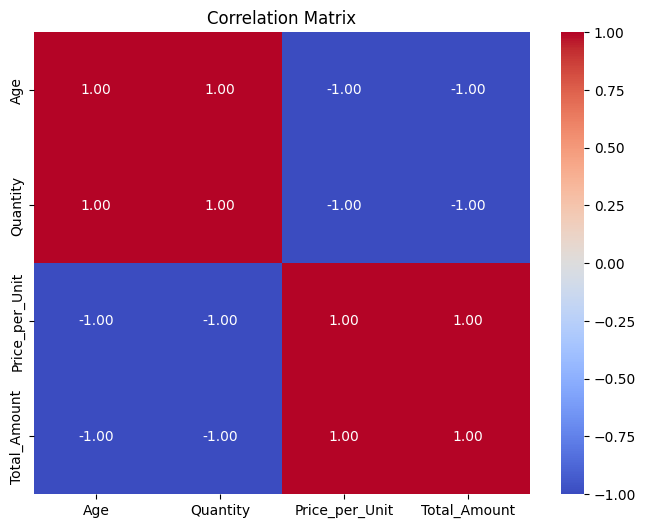

In [12]:
# Correlation matrix
correlation_matrix = df[['Age', 'Quantity', 'Price_per_Unit', 'Total_Amount']].corr()

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



Revenue Contribution by Gender (%):
Gender
Female    86.956522
Male      13.043478
Name: Total_Amount, dtype: float64


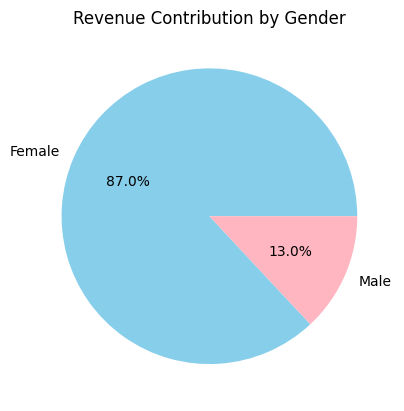

In [13]:
# Revenue contribution by gender
gender_revenue = df.groupby('Gender')['Total_Amount'].sum()
gender_revenue_percentage = (gender_revenue / gender_revenue.sum()) * 100
print("\nRevenue Contribution by Gender (%):")
print(gender_revenue_percentage)

# Pie chart for revenue contribution
gender_revenue_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightpink'])
plt.title("Revenue Contribution by Gender")
plt.ylabel("")  # Hide y-axis label
plt.show()


<ipython-input-14-c61ccd3cd94f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_revenue = df.groupby('Age_Group')['Total_Amount'].sum().reset_index()
<ipython-input-14-c61ccd3cd94f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Total_Amount', data=age_group_revenue, palette='Set3')


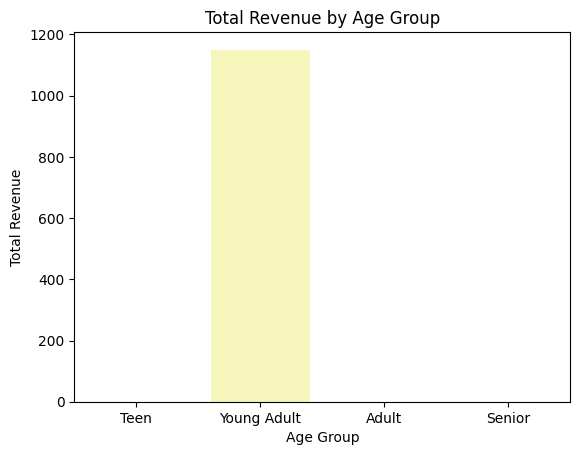

In [14]:
# Total revenue by age group
age_group_revenue = df.groupby('Age_Group')['Total_Amount'].sum().reset_index()

# Visualization
sns.barplot(x='Age_Group', y='Total_Amount', data=age_group_revenue, palette='Set3')
plt.title("Total Revenue by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Revenue")
plt.show()


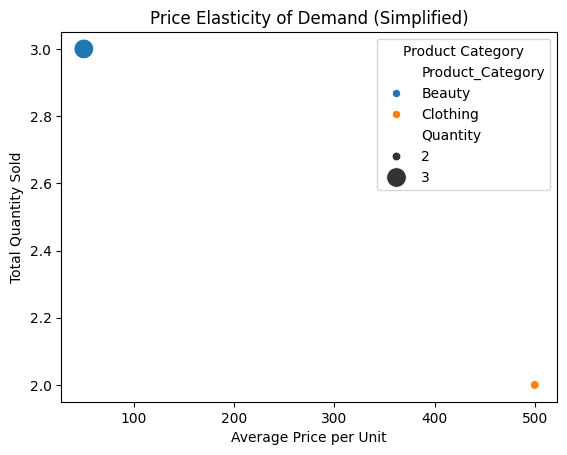

In [15]:
# Price elasticity: Quantity per product vs Price per unit
price_demand = df.groupby('Product_Category').agg({'Price_per_Unit': 'mean', 'Quantity': 'sum'}).reset_index()

sns.scatterplot(x='Price_per_Unit', y='Quantity', data=price_demand, hue='Product_Category', size='Quantity', sizes=(40, 200))
plt.title("Price Elasticity of Demand (Simplified)")
plt.xlabel("Average Price per Unit")
plt.ylabel("Total Quantity Sold")
plt.legend(title="Product Category")
plt.show()


In [16]:
from scipy.stats import ttest_ind

# Separate data by gender
male_spending = df[df['Gender'] == 'Male']['Total_Amount']
female_spending = df[df['Gender'] == 'Female']['Total_Amount']

# Perform t-test
t_stat, p_value = ttest_ind(male_spending, female_spending)
print("\nT-test Results:")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Conclusion: Significant difference in spending between Male and Female customers.")
else:
    print("Conclusion: No significant difference in spending between Male and Female customers.")



T-test Results:
T-statistic: nan, P-value: nan
Conclusion: No significant difference in spending between Male and Female customers.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df



Profit by Product Category:
  Product_Category  Profit
1         Clothing   300.0
0           Beauty    45.0


<ipython-input-17-dee530705d4b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category', y='Profit', data=profit_by_category, palette='Spectral')


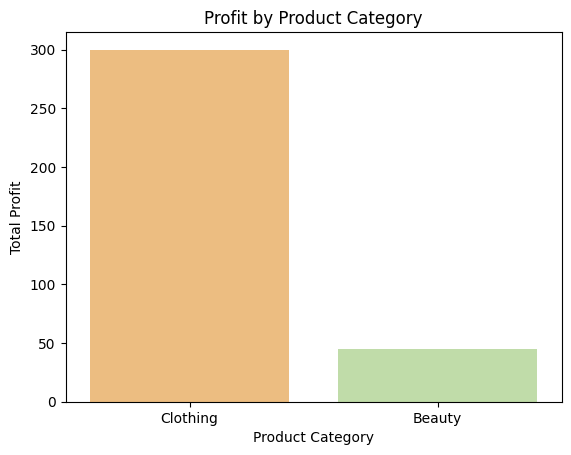

In [17]:
# Add a hypothetical cost column (e.g., 70% of price per unit)
df['Cost_per_Unit'] = df['Price_per_Unit'] * 0.7

# Calculate profit per product
df['Profit'] = (df['Price_per_Unit'] - df['Cost_per_Unit']) * df['Quantity']

# Total profit by product category
profit_by_category = df.groupby('Product_Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

print("\nProfit by Product Category:")
print(profit_by_category)

# Visualization
sns.barplot(x='Product_Category', y='Profit', data=profit_by_category, palette='Spectral')
plt.title("Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.show()


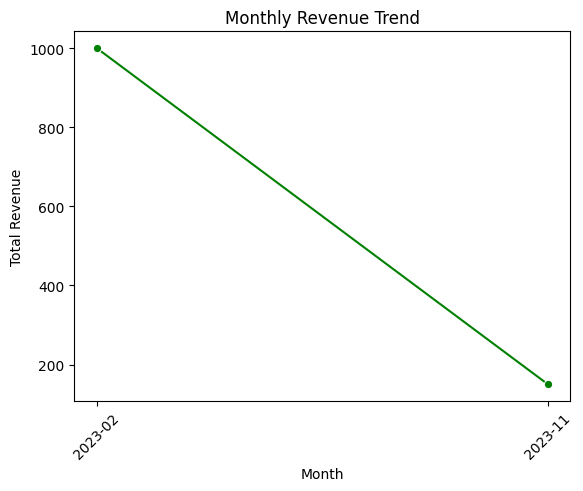

In [19]:
# Extract month and year
df['Month'] = df['Date'].dt.to_period('M')

# Monthly revenue
monthly_revenue = df.groupby('Month')['Total_Amount'].sum().reset_index()

# Convert 'Month' to string before plotting
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str) # Convert Period objects to strings

# Visualization
sns.lineplot(x='Month', y='Total_Amount', data=monthly_revenue, marker='o', color='green')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()



Top 5 Peak Shopping Days:
        Date  Total_Amount
0 2023-02-27          1000
1 2023-11-24           150


<ipython-input-20-602d7861a753>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Date', y='Total_Amount', data=top_shopping_days, palette='coolwarm')


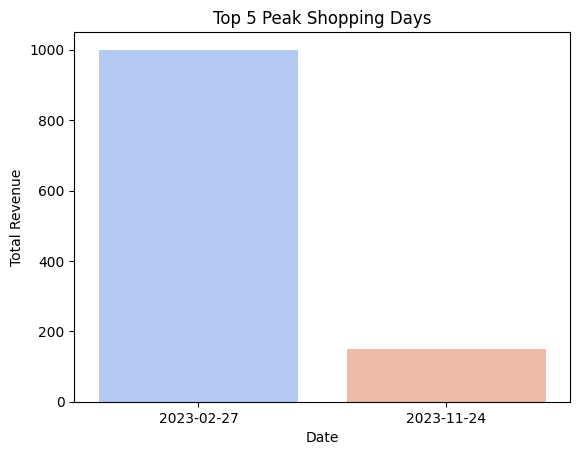

In [20]:
# Total revenue by date
daily_revenue = df.groupby('Date')['Total_Amount'].sum().reset_index()

# Top 5 peak shopping days
top_shopping_days = daily_revenue.sort_values(by='Total_Amount', ascending=False).head(5)
print("\nTop 5 Peak Shopping Days:")
print(top_shopping_days)

# Visualization
sns.barplot(x='Date', y='Total_Amount', data=top_shopping_days, palette='coolwarm')
plt.title("Top 5 Peak Shopping Days")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.show()


In [21]:
# Save enriched dataset
df.to_csv('enhanced_retail_dataset.csv', index=False)
print("\nEnhanced dataset saved as 'enhanced_retail_dataset.csv'")



Enhanced dataset saved as 'enhanced_retail_dataset.csv'
